In [1]:
import geopandas as gpd
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import hydrant.topology.geom as gm
import subprocess
import os
from   shapely.geometry import Point

In [2]:
# inputs
path_out = './output/'
codes = ['7020014250'] # Colombia
path_riv= '/home/shg096/projects/rpp-kshook/CompHydCore/TDX_hydro/'
path_cat= '/home/shg096/projects/rpp-kshook/CompHydCore/TDX_hydro/'
riv_file_template= '*-streamnet-gpkg'
cat_file_template= '*-basins-gpkg'

In [3]:
if not os.path.isdir(path_out):
    os.makedirs(path_out)

# Load and append the pfaf

In [4]:
riv, cat = gm.tdx_read_file(codes = ['7020014250'],
                            path_riv= '/home/shg096/projects/rpp-kshook/CompHydCore/TDX_hydro/',
                            riv_file_template= '*-streamnet-gpkg',
                            path_cat= '/home/shg096/projects/rpp-kshook/CompHydCore/TDX_hydro/',
                            cat_file_template= '*-basins-gpkg')

# prepare the network topology

In [6]:
riv, cat = gm.prepare_ntopo(riv=riv,\
                            riv_cols={'id':'LINKNO', 'next_id':'DSLINKNO'},\
                            cat=cat,\
                            cat_cols={'id':'streamID', 'hillslope':'hillslope', 'area' :'area'},\
                            network = 'tdx',
                            outlet_val = -1)

# Example-1 From Fraser River

In [7]:
# set the case name
prefix = 'Fraser_tdx_'

In [8]:
# slice the domain for various stations and their seg ID
cat_slice, riv_slice = gm.subset_ntopo(cat=cat,\
                                       cat_cols={'id':'streamID'},\
                                       riv=riv,\
                                       riv_cols={'id':'LINKNO', 'next_id':'DSLINKNO'},\
                                       outlet_id=[217371],
                                       outlet_val = -1) # segment that is aimed to make the subbasin for

<AxesSubplot:>

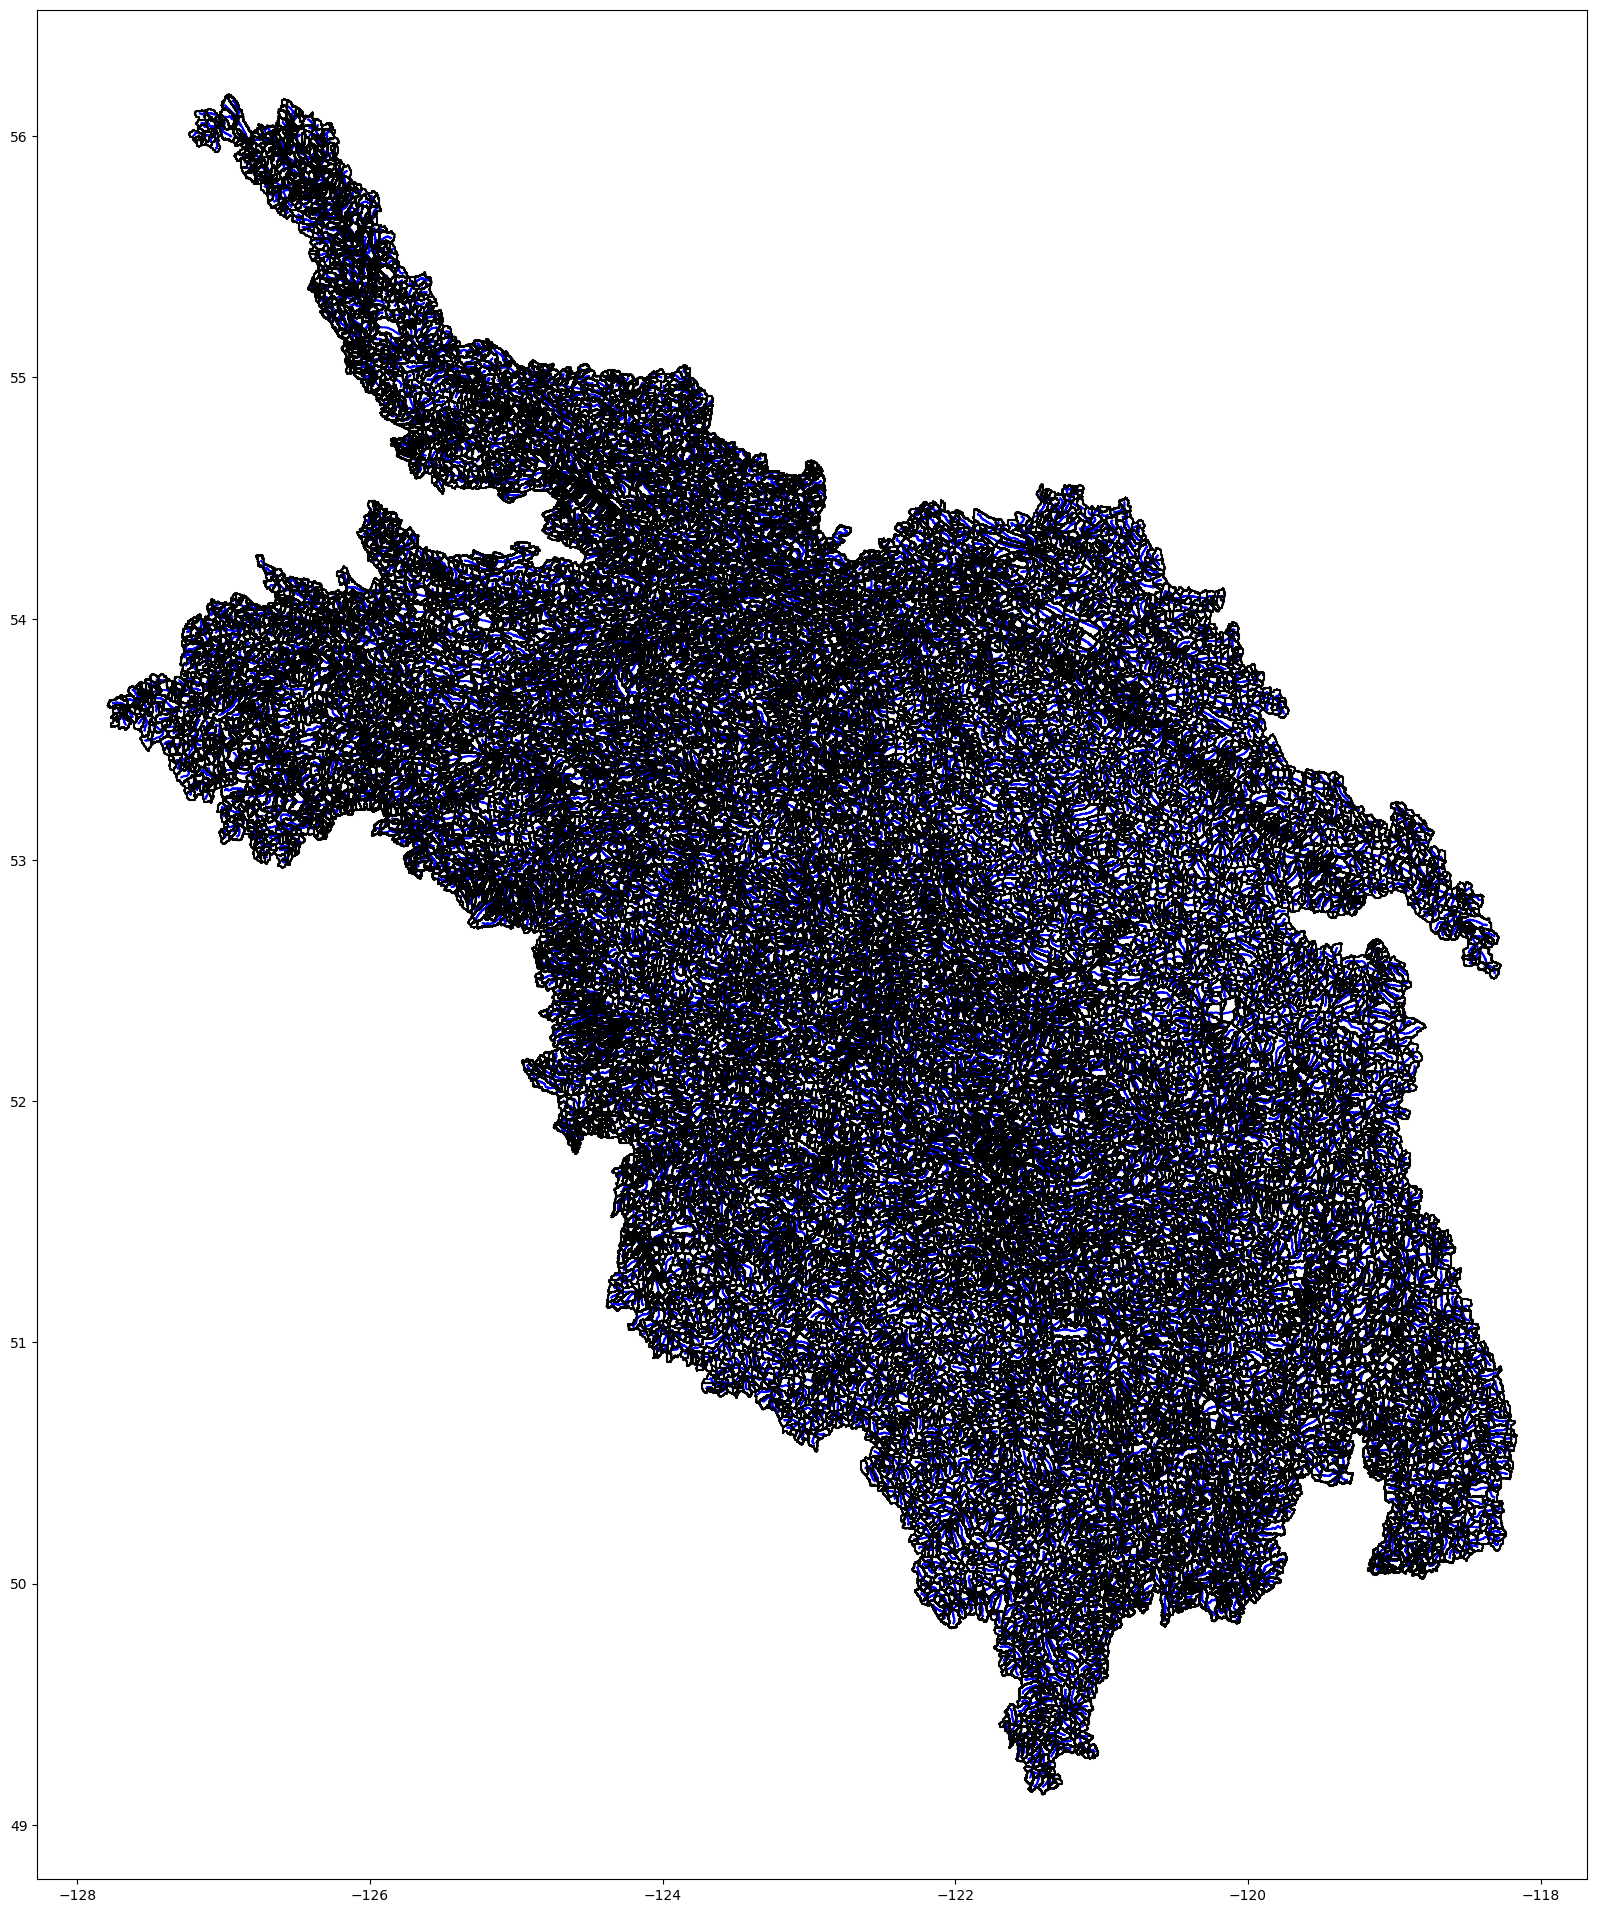

In [9]:
fig, ax = plt.subplots(figsize=(20,30))
riv_slice.plot(ax=ax, color='b')
cat_slice.boundary.plot(ax=ax, color='k')

In [10]:
xr_ntopo = gm.create_xr_ntopo(riv_slice,
                              cat_slice,
                              network = 'tdx')
xr_ntopo

<xarray.Dataset>
Dimensions:     (index: 28068)
Coordinates:
  * index       (index) int64 0 1 2 3 4 5 ... 28063 28064 28065 28066 28067
Data variables: (12/25)
    LINKNO      (index) int64 38111 67870 46045 79774 ... 149911 171738 217371
    DSLINKNO    (index) int64 79774 79774 63901 63901 ... 217371 217371 -1
    DSNODEID    (index) int64 -1 -1 -1 -1 -1 -1 -1 -1 ... -1 -1 -1 -1 -1 -1 -1
    strmOrder   (index) int64 1 1 1 2 1 1 2 2 1 1 1 1 ... 1 2 2 8 2 2 2 8 3 8 8
    Length      (index) float64 807.4 814.3 140.4 ... 2.724e+03 4.144e+03
    Magnitude   (index) int64 1 1 1 2 1 1 3 2 ... 2 2 3 14031 4 14034 14038
    ...          ...
    up2         (index) int64 0 0 0 67870 0 ... 187609 132052 189593 171738
    up3         (index) int64 0 0 0 0 0 0 0 0 0 0 0 0 ... 0 0 0 0 0 0 0 0 0 0 0
    area        (index) float64 6.12e+06 5.093e+06 ... 6.701e+06 3.457e+06
    hillslope   (index) int64 0 0 0 0 0 0 0 0 0 0 0 0 ... 0 0 0 0 0 0 0 0 0 0 0
    Rank        (index) int64 1 2 3 4 5 6 ... 28064 28065 28066 28067 28068
    Rank_Next   (index) int64 4 4 7 7 8 8 15 ... 28066 28067 28067 28068 28068 0

# Save

In [11]:
cat_slice.to_file(path_out+prefix+'cat.shp')
riv_slice.to_file(path_out+prefix+'riv.shp')
xr_ntopo.to_netcdf(path_out+prefix+'ntopo.nc')